# Gun Violence EDA

Hello! This is the notebook where everyone will contribute their EDA work. Please update this notebook with your code, and change the names of the gun violence dataframe you used in your analyses to match `gun_data` as loaded in the cell below. 

## Set Up

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

## Load in Data 

In [2]:
# gun_data = pd.read_csv('stage3.csv')
gun_data = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
missing_row = ['sban_1', '2017-10-01', 'Nevada', 'Las Vegas', 'Mandalay Bay 3950 Blvd S', 59, 489, 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', '-', '-', '-', '-', '-', '36.095', 'Hotel', 
               '-115.171667', 47, 'Route 91 Harvest Festiva; concert, open fire from 32nd floor. 47 guns seized; TOTAL:59 kill, 489 inj, number shot TBD,girlfriend Marilou Danley POI', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
gun_data.loc[len(gun_data)] = missing_row
# Create some additional features
gun_data['date'] = pd.to_datetime(gun_data['date'])
gun_data['year'] = gun_data['date'].dt.year
gun_data['month'] = gun_data['date'].dt.month
gun_data['monthday'] = gun_data['date'].dt.day
gun_data['weekday'] = gun_data['date'].dt.weekday
gun_data['loss'] = gun_data['n_killed'] + gun_data['n_injured']
gun_data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,monthday,weekday,loss
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1,1,1,4
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,1,1,1,4
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013,1,1,1,4
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013,1,5,5,4
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013,1,7,0,4


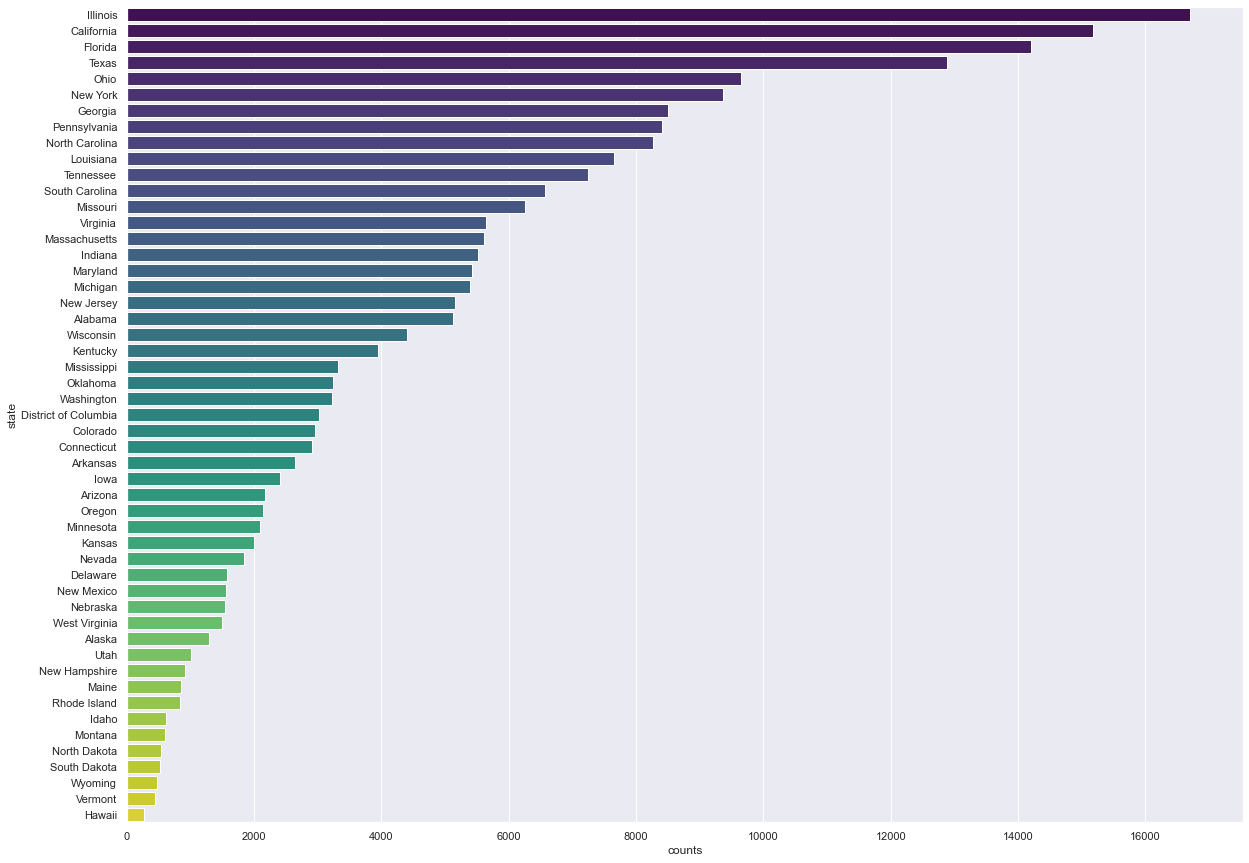

In [3]:
df_state = gun_data[(gun_data['year'] > 2013) & (gun_data['year'] < 2018)]
df_state = df_state.groupby(['state']).size().reset_index(name='counts')
df_state = df_state.sort_values(by='counts', ascending=False)
sns.set(rc = {'figure.figsize':(20,15)})
sns.barplot(x='counts', y='state', data=df_state, palette='viridis');

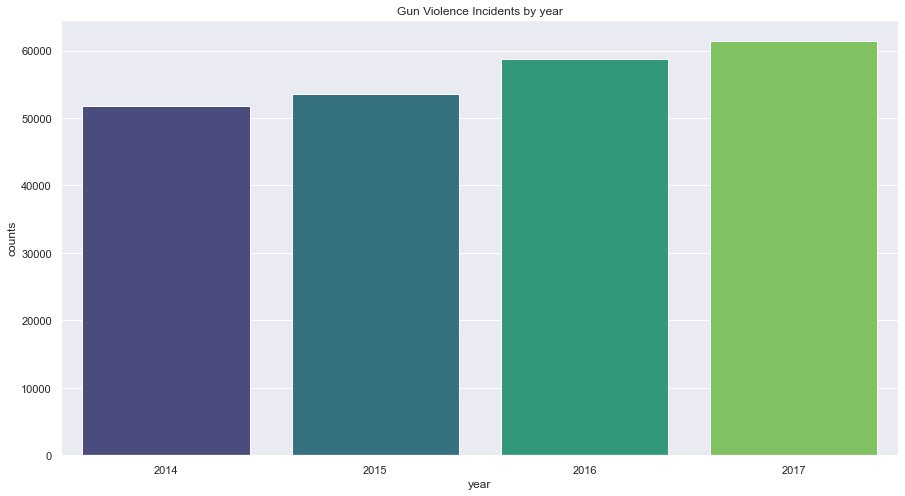

In [21]:
df_year = gun_data.loc[:,['year', 'state']]
df_year = df_year.groupby(['year']).size().reset_index(name='counts')
# print(df_year)
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x='year', y='counts', data=df_year.loc[1:4,:], palette='viridis').set(title="Gun Violence Incidents by year");

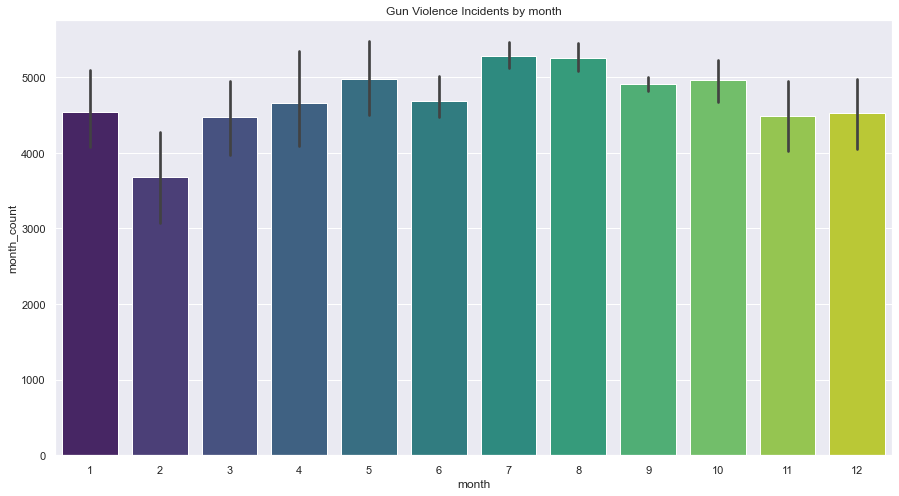

In [26]:
df_month = gun_data[(gun_data['year'] != 2013) & (gun_data['year'] != 2018)]
df_month = df_month.groupby(['year', 'month']).agg({'month': 'count'}).rename(columns={'month': 'month_count'}).reset_index()
# print(df_month)
sns.barplot(x="month", y="month_count", data=df_month, palette='viridis').set(title="Gun Violence Incidents by month");

Text(0, 0.5, 'counts')

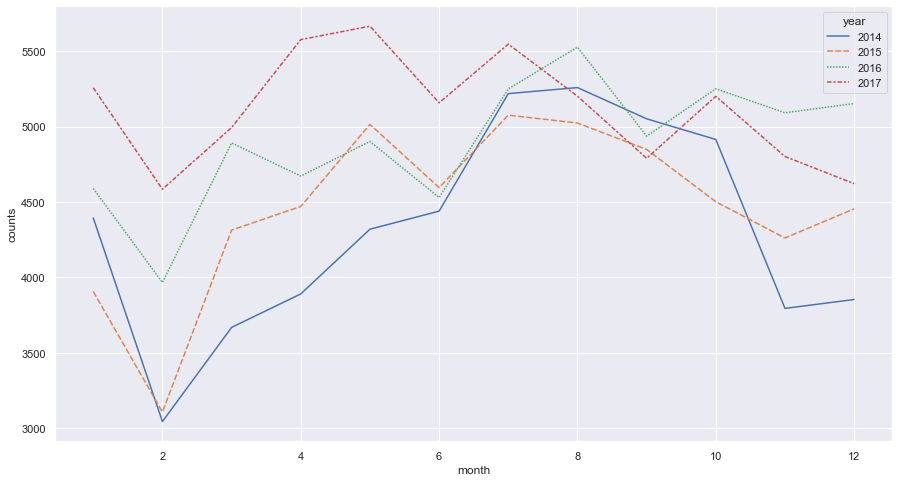

In [6]:
df_month_pattern = gun_data[(gun_data['year'] != 2013) & (gun_data['year'] != 2018)]
df_month_pattern = df_month_pattern.groupby(['year', 'month']).size().reset_index(name='counts')
df_month_pattern = df_month_pattern.pivot(index='month', columns='year', values='counts')
#print(df_month_pattern)
sns.set(rc = {'figure.figsize':(15,8)})
month_lineplot = sns.lineplot(data=df_month_pattern)
month_lineplot.set_ylabel("counts")


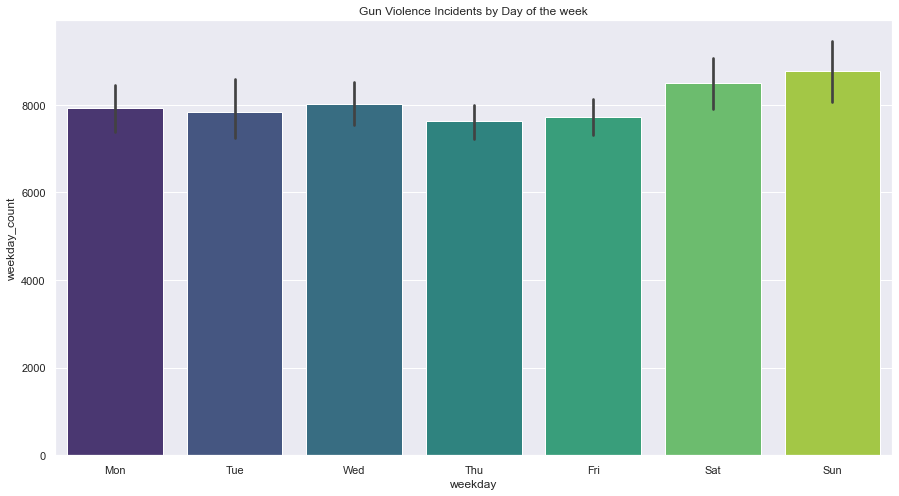

In [24]:
df_week = gun_data[(gun_data['year'] != 2013) & (gun_data['year'] != 2018)]
df_week = df_week.groupby(['year', 'weekday']).agg({'weekday': 'count'}).rename(columns={'weekday': 'weekday_count'}).reset_index()
map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df_week['weekday'] = df_week['weekday'].map(map)
df_week
sns.barplot(x="weekday", y="weekday_count", data=df_week, palette='viridis').set(title="Gun Violence Incidents by Day of the week");

In [8]:
laws_data = pd.read_csv('statefirearmlaws.csv')
df_laws = laws_data[(laws_data['year'] > 2013) & (laws_data['year'] < 2018)]
df_laws = df_laws.groupby(['state']).sum().reset_index().sort_values(by='lawtotal', ascending=False)
df_laws.head()

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
4,California,8062,4,4,0,4,0,0,4,0,...,4,4,4,4,4,4,4,4,4,412
20,Massachusetts,8062,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,404
6,Connecticut,8062,4,4,4,4,4,0,0,4,...,2,4,4,4,2,2,2,0,4,342
10,Hawaii,8062,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,0,2,314
31,New York,8062,4,4,4,4,4,0,0,4,...,4,4,4,4,4,4,4,0,4,296


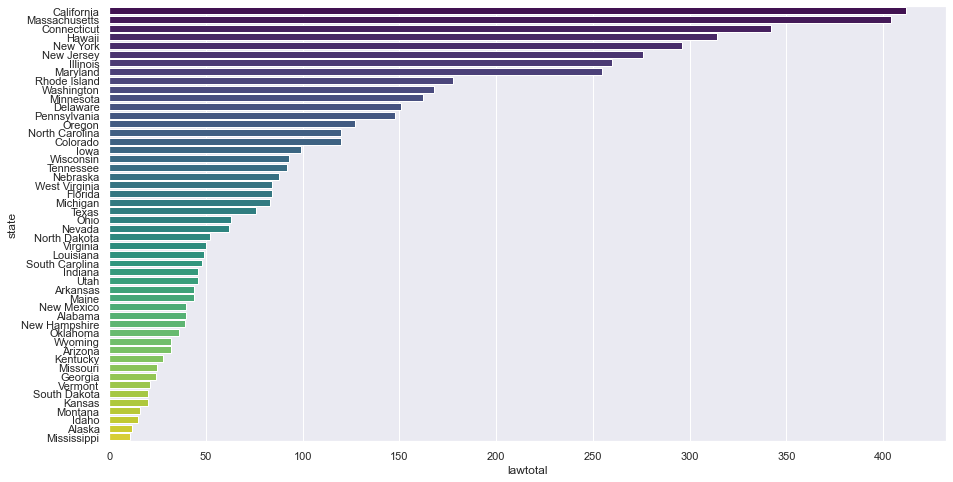

In [9]:
sns.barplot(x='lawtotal', y='state', data=df_laws, palette='viridis');

In [10]:
df_state_laws = pd.merge(df_state, df_laws, how='inner', on='state')
df_state_laws = df_state_laws.drop(['year'], axis=1)
df_state_laws.head()

,state,counts,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
0,Illinois,16695,4,4,4,4,4,0,0,4,...,4,4,4,4,4,4,4,0,4,260
1,California,15171,4,4,0,4,0,0,4,0,...,4,4,4,4,4,4,4,4,4,412
2,Florida,14197,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,84
3,Texas,12890,4,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,76
4,Ohio,9643,0,4,0,4,0,0,4,0,...,0,0,0,0,0,0,0,0,0,63


In [11]:
states_population = pd.read_csv('us_states_census.csv')
df_pop = states_population.loc[:,['state', '2014', '2015', '2016', '2017']]
df_pop['population'] = df_pop[['2014', '2015', '2016', '2017']].mean(axis=1)
df_pop = df_pop.drop(['2014', '2015', '2016', '2017'], axis=1)
df_pop.at[8,'state']='Columbia'
df_states = pd.merge(df_state_laws, df_pop, how='inner', on='state')
df_states
df_states['per_counts'] = 10000 * df_states['counts']/df_states['population']
# df_states.to_csv('df_states.csv', sep=',')
# df_states.head()
stat, p = scipy.stats.pearsonr(df_states['per_counts'], df_states['lawtotal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('There is not enough evidence to reject H0. Probably independent')
else:
	print('There is enough evidence to reject H0. Probably dependent')
# law_tatoal vs. gun_violence_counts per 10000 people

stat=-0.183, p=0.204
There is not enough evidence to reject H0. Probably independent


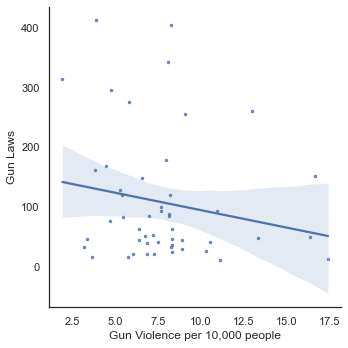

In [12]:
sns.set_style('white')
ax = sns.lmplot(x="per_counts", y="lawtotal", data=df_states, scatter_kws={'s': 6}, legend=True)
ax.set(ylabel="Gun Laws")
ax.set(xlabel="Gun Violence per 10,000 people");

# Hypothesis Testing

The hypothesis that we will be testing is that states with more strict gun laws have a smaller amount of gun violence indicidents compared to states with less strict gun laws.


In [13]:
#gunlaws = pd.read_csv("gun_laws.csv")
gun_laws = pd.DataFrame(data = laws_data,columns=['state', 'year', 'lawtotal'])
# gun_laws = pd.DataFrame(data = gunlaws,columns=['state', 'year', 'lawtotal'])

gun_laws.head()


,state,year,lawtotal
0,Alabama,1991,15
1,Alabama,1992,16
2,Alabama,1993,16
3,Alabama,1994,16
4,Alabama,1995,16


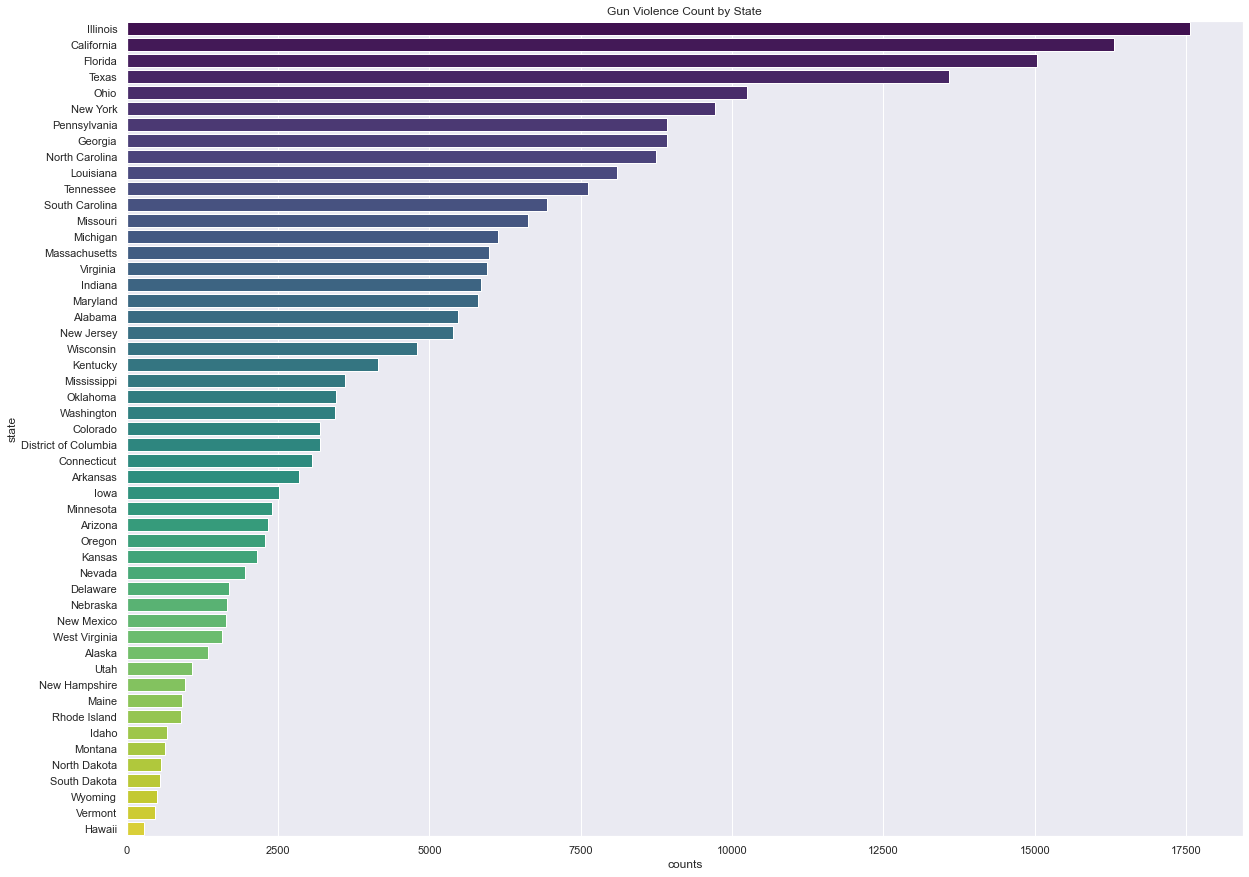

In [14]:
df_state = gun_data.groupby(['state']).size().reset_index(name='counts')
df_state = df_state.sort_values(by='counts', ascending=False)
sns.set(rc = {'figure.figsize':(20,15)})
sns.barplot(x='counts', y='state', data=df_state, palette='viridis').set(title="Gun Violence Count by State");

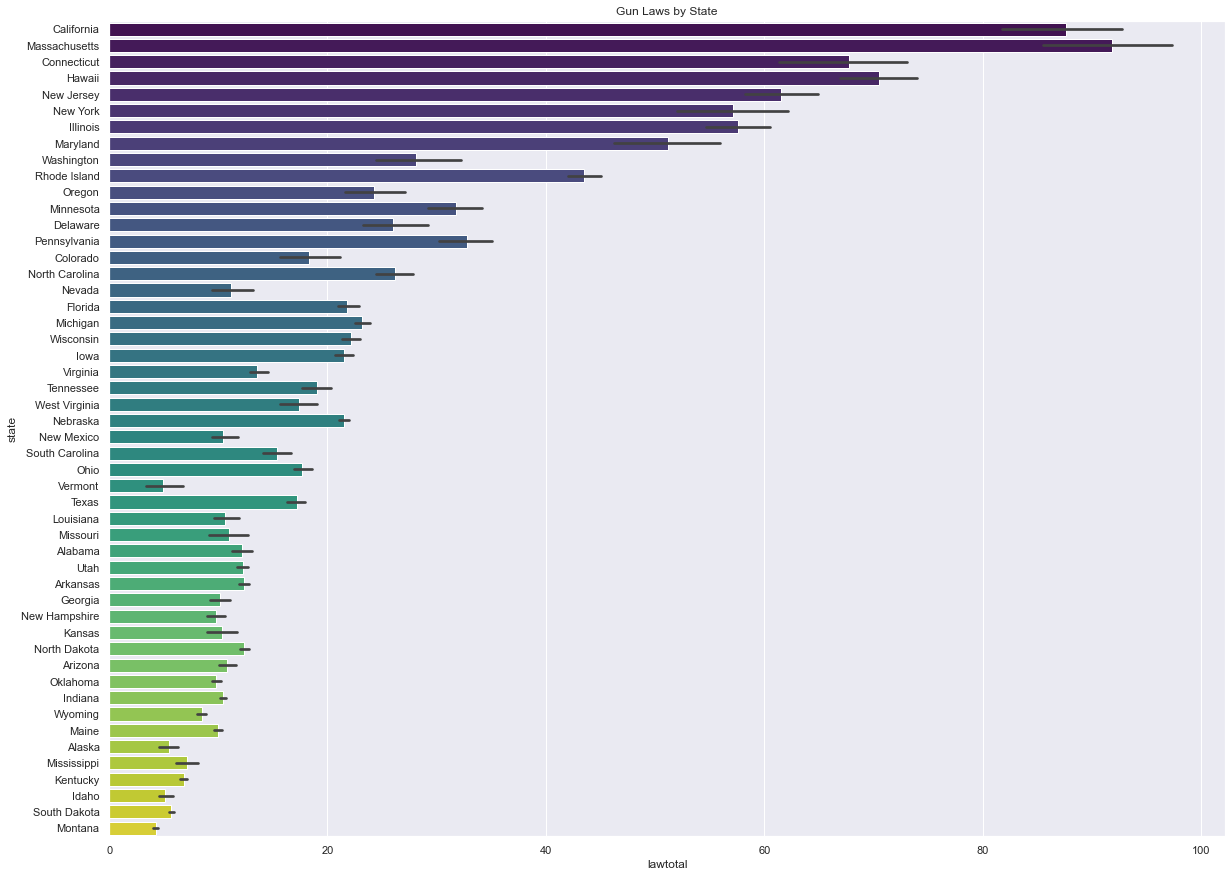

In [15]:
df_laws = gun_laws.sort_values(by='lawtotal', ascending=False)
sns.set(rc = {'figure.figsize':(20,15)})
sns.barplot(x='lawtotal', y='state', data=df_laws, palette='viridis').set(title="Gun Laws by State");

Looking at the visualizations, Illinois has the highest gun violence incidents and Hawaii has the least number of incidents. However, the population difference is very large. Michigan's population is closer to Illinois' population, so we will compare those two states.


In [16]:
top_state_inc = pd.DataFrame(df_state[df_state['state'] == 'Illinois'])
low_state_inc = pd.DataFrame(df_state[df_state['state'] =='Michigan'])

list_states_inc = [top_state_inc, low_state_inc]
stats_inc = pd.concat(list_states_inc)

stats_inc

,state,counts
13,Illinois,17556
22,Michigan,6136


In [17]:
top_state_law = pd.DataFrame(gun_laws[gun_laws['state'] == 'Illinois'])
top_state_law = top_state_law[top_state_law['year'] == 2018]
low_state_law = pd.DataFrame(gun_laws[gun_laws['state'] =='Michigan'])
low_state_law = low_state_law[low_state_law['year'] == 2018]

list_states_laws = [top_state_law, low_state_law]
stats_laws = pd.concat(list_states_laws)

stats_laws


,state,year,lawtotal
387,Illinois,2018,65
657,Michigan,2018,21


# Hypothesis Results

[Text(0.5, 1.0, 'Number of Incidents in Illinois v Michigan')]

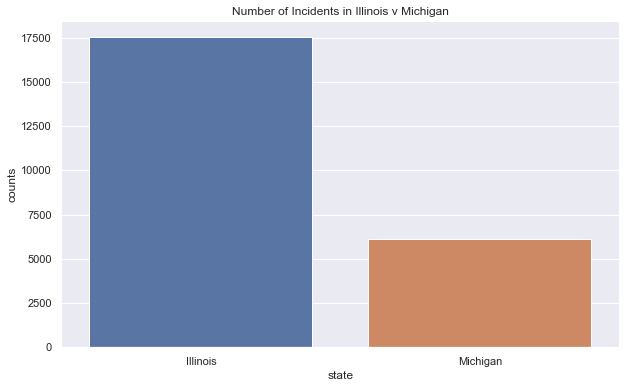

In [18]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.barplot(data=stats_inc, x="state", y="counts").set(title="Number of Incidents in Illinois v Michigan")

[Text(0.5, 1.0, 'Number of Gun Laws in Illinois v Michigan')]

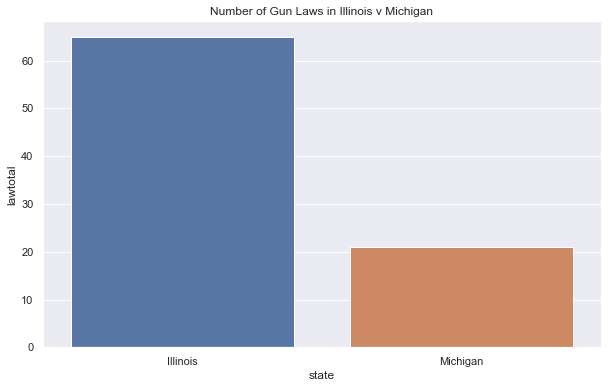

In [19]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.barplot(data=stats_laws, x="state", y="lawtotal").set(title="Number of Gun Laws in Illinois v Michigan")

Our hypothesis is incorrect. Illinois has the highest number of gun-related incidents, but a higher number of gun laws. Michigan has a lower number of gun-related incidents, and a lower number of gun laws. Given that our hypothesis was that states with low gun-reated incidents have higher gun laws, and vice versa, our hypothesis was incorrect. 